<!-- STEPS TO TAKE TO ACHIEVE THE GOAL -->

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Missing values and duplicates](#Missing)
5. [Outliers](#Outliers)
6. [Feature engineering](#Engineering)
7. [Date features EDA](#Dates)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Making predictions of the test set and creating a submission file](#Predictions)

In [1]:
# Mount Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data
dementia=pd.read_csv("/content/gdrive/MyDrive/dementia_dataset.csv")

In [4]:
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
#Exploratory Data Analysis
# number of rows and columns to deal with
dementia.shape

(373, 15)

In [6]:
# statistical summary
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


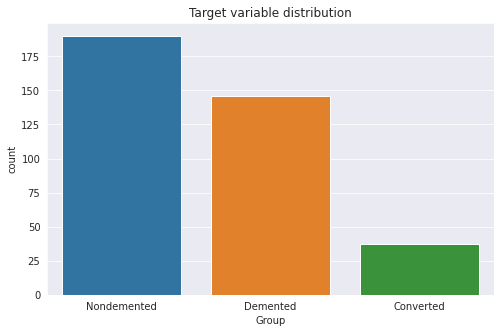

In [7]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(dementia["Group"])
plt.title('Target variable distribution')
plt.show()

In [8]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d07f61b10>,
      dtype=object)

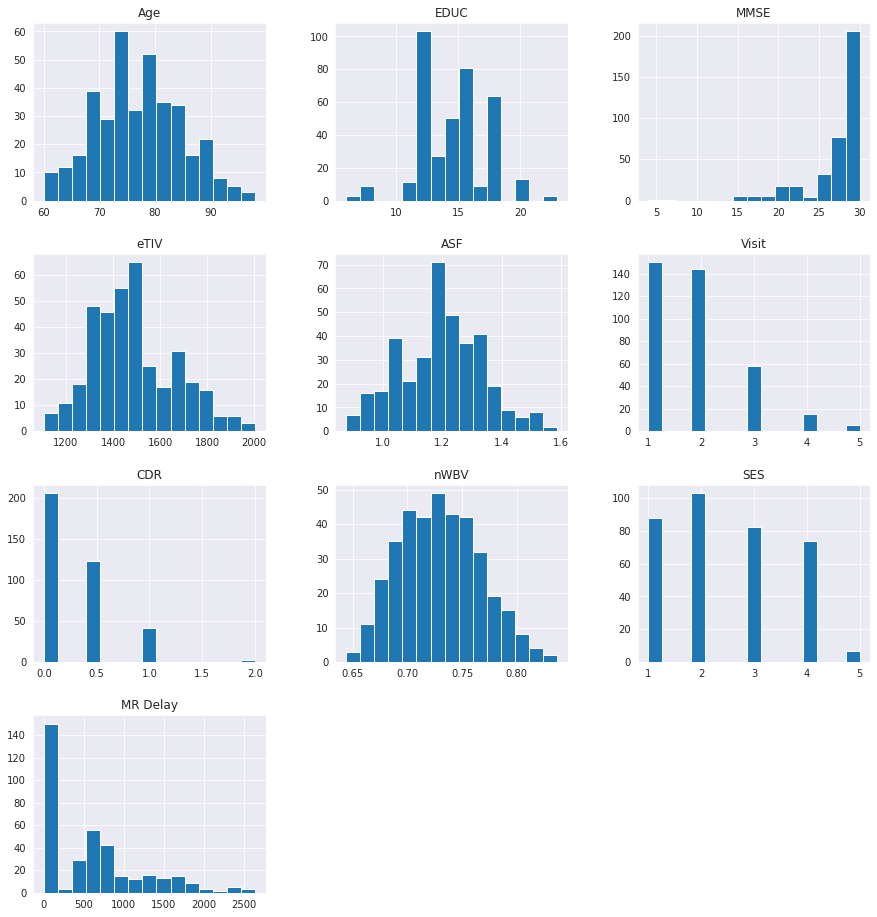

In [9]:
# Distributions of some features
numerical = ["Age", "EDUC", "MMSE", "eTIV", "ASF","Visit","CDR","nWBV","SES","MR Delay"]
dementia[numerical].hist(bins=15, figsize=(15, 16))

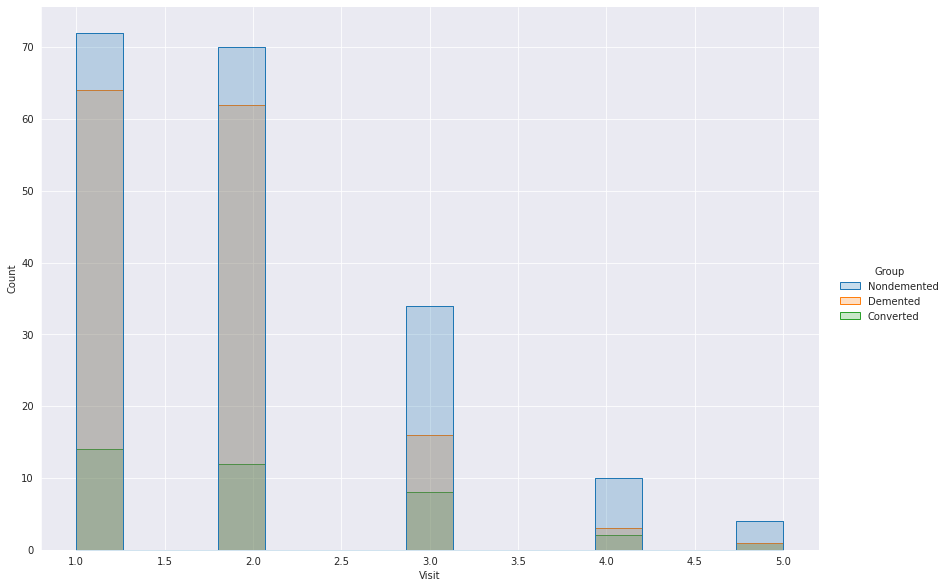

In [10]:
sns.displot(dementia, x="Visit", hue="Group", element="step", height=8.27, aspect=11.7/8.27)

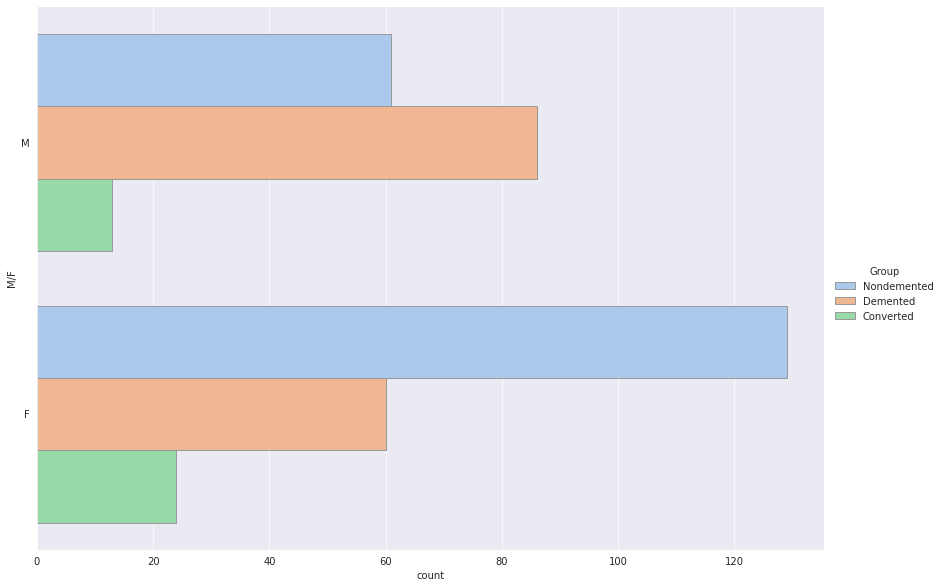

In [12]:
sns.catplot(y="M/F", hue="Group", kind="count",
            palette="pastel", edgecolor=".6",
            data=dementia, height=8.27, aspect=11.7/8.27)

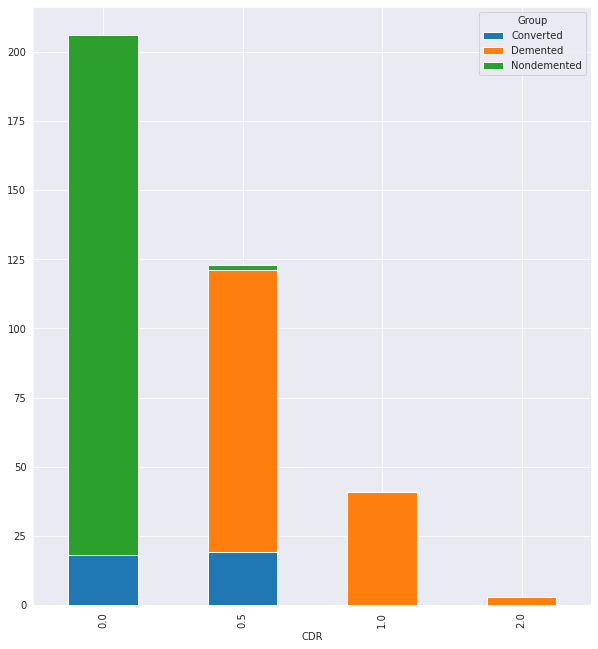

In [13]:
pd.crosstab(dementia['CDR'],dementia['Group']).plot.bar(stacked=True, figsize=(10, 11))

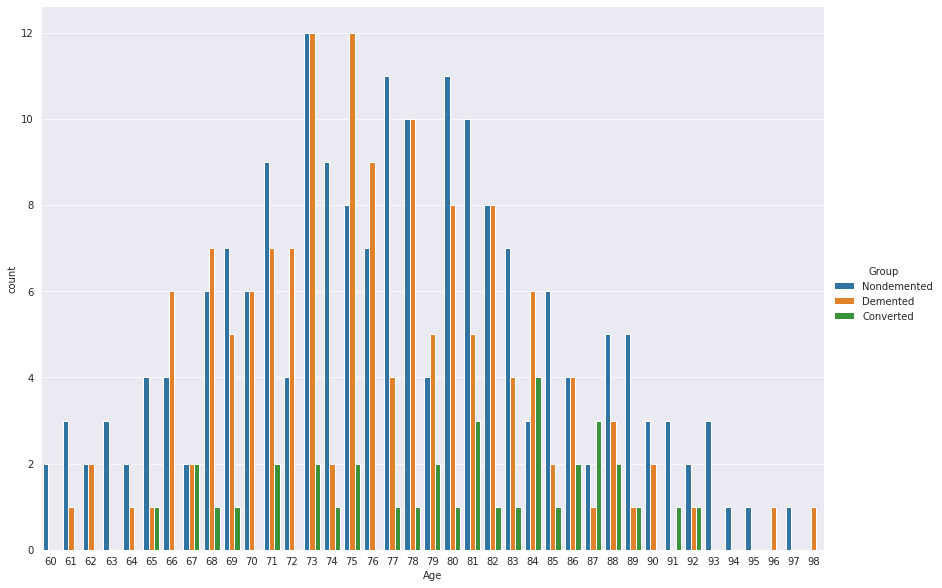

In [14]:
sns.catplot(x='Age',hue='Group',data=dementia,kind="count", height=8.27, aspect=11.7/8.27)

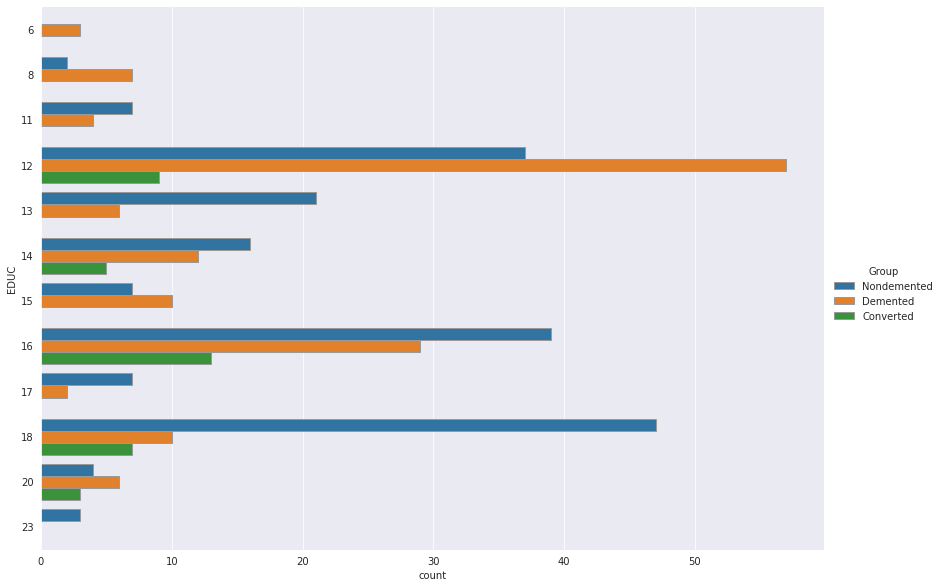

In [15]:
sns.catplot(y="EDUC", hue="Group", kind="count", edgecolor=".6",
            data=dementia, height=8.27, aspect=11.7/8.27)

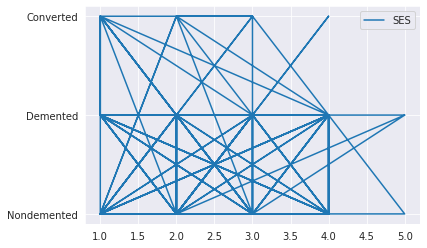

In [16]:
fig, ax = plt.subplots()
ax.plot(dementia["SES"], dementia["Group"],label="SES")
ax.legend()
plt.show()

In [17]:
# DATA QUALITY ISSUES

In [18]:
!pip install missingno

In [19]:
import missingno as msno

In [20]:
dementia.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

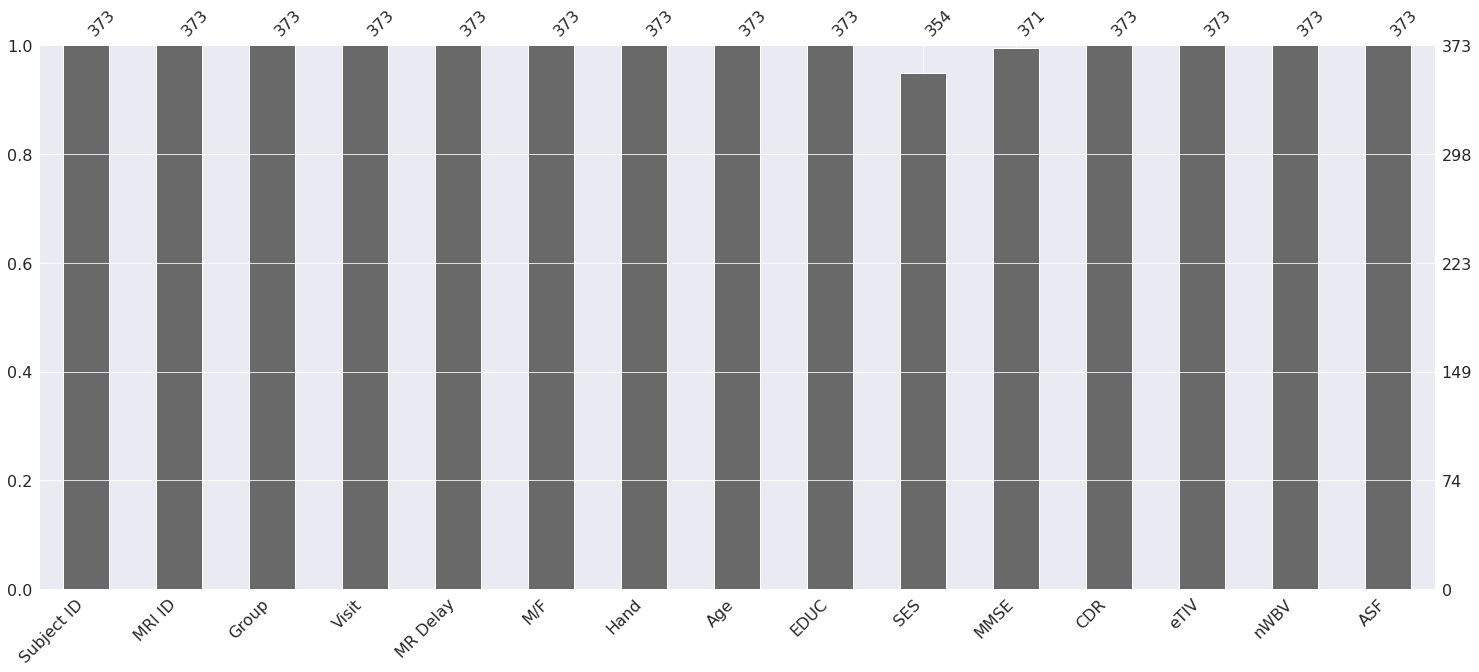

In [21]:
msno.bar(dementia)

In [22]:
# Handling Missing Values

In [23]:
dementia['SES'].fillna(dementia['SES'].mean(),inplace=True)
dementia['MMSE'].fillna(dementia['MMSE'].mean(),inplace=True)

In [24]:
dementia.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [25]:
# Check for duplicates
dementia.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

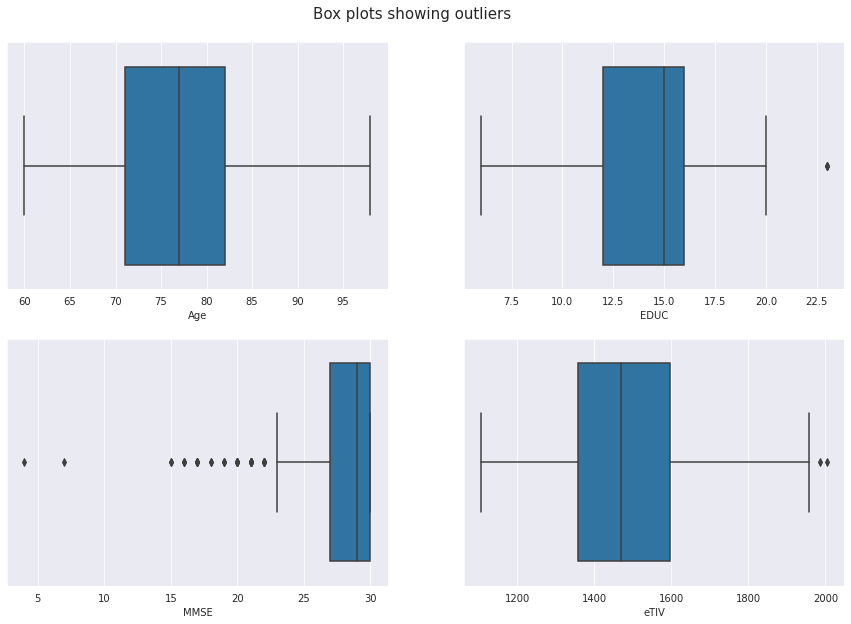

In [26]:
# Outliers1
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dementia,["Age", "EDUC", "MMSE", "eTIV", "ASF","Visit","CDR","nWBV","SES","MR Delay"]):
  sns.boxplot(dementia[name], ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

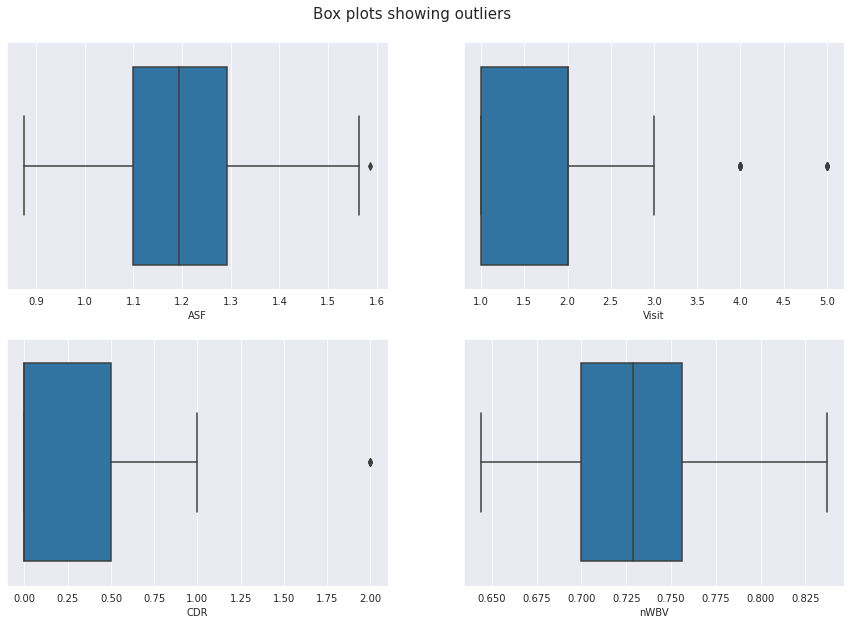

In [27]:
# Outliers
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dementia,["ASF","Visit","CDR","nWBV","SES","MR Delay"]):
  sns.boxplot(dementia[name], ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


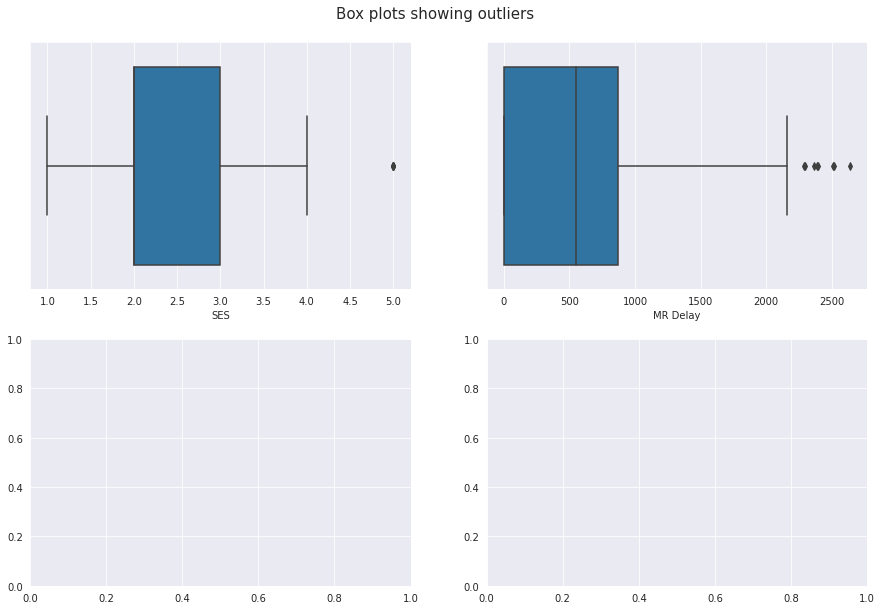

In [28]:
# Outliers
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dementia,["SES","MR Delay"]):
  sns.boxplot(dementia[name], ax = ax)

In [29]:
# Handling Outliers Data Issues
upper=dementia.EDUC.mean()+ 3*dementia.EDUC.std()
lower=dementia.EDUC.mean() - 3*dementia.EDUC.std()
dementia[(dementia.EDUC >upper) | (dementia.EDUC<lower)]
o_outlier=dementia[(dementia.EDUC >upper) & (dementia.EDUC<lower)]
dementia['zscore']=(dementia.EDUC - dementia.EDUC.mean())/dementia.EDUC.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]

# Handling Outliers Data Issues
upper=dementia.MMSE.mean()+ 3*dementia.MMSE.std()
lower=dementia.MMSE.mean() - 3*dementia.MMSE.std()
dementia[(dementia.MMSE >upper) | (dementia.MMSE<lower)]
o_outlier=dementia[(dementia.MMSE >upper) & (dementia.MMSE<lower)]
dementia['zscore']=(dementia.MMSE - dementia.MMSE.mean())/dementia.MMSE.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]

upper=dementia.eTIV.mean()+ 3*dementia.eTIV.std()
lower=dementia.eTIV.mean() - 3*dementia.eTIV.std()
dementia[(dementia.eTIV >upper) | (dementia.eTIV<lower)]
o_outlier=dementia[(dementia.eTIV >upper) & (dementia.eTIV<lower)]
dementia['zscore']=(dementia.eTIV - dementia.eTIV.mean())/dementia.eTIV.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]

upper=dementia.ASF.mean()+ 3*dementia.ASF.std()
lower=dementia.ASF.mean() - 3*dementia.ASF.std()
dementia[(dementia.ASF >upper) | (dementia.ASF<lower)]
o_outlier=dementia[(dementia.ASF >upper) & (dementia.ASF<lower)]
dementia['zscore']=(dementia.ASF - dementia.ASF.mean())/dementia.ASF.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]

upper=dementia.Visit.mean()+ 3*dementia.Visit.std()
lower=dementia.Visit.mean() - 3*dementia.Visit.std()
dementia[(dementia.Visit >upper) | (dementia.Visit<lower)]
o_outlier=dementia[(dementia.Visit >upper) & (dementia.Visit<lower)]
dementia['zscore']=(dementia.Visit - dementia.Visit.mean())/dementia.Visit.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]

upper=dementia.CDR.mean()+ 3*dementia.CDR.std()
lower=dementia.CDR.mean() - 3*dementia.CDR.std()
dementia[(dementia.CDR >upper) | (dementia.CDR<lower)]
o_outlier=dementia[(dementia.CDR >upper) & (dementia.CDR<lower)]
dementia['zscore']=(dementia.CDR - dementia.CDR.mean())/dementia.CDR.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]

upper=dementia.SES.mean()+ 3*dementia.SES.std()
lower=dementia.SES.mean() - 3*dementia.SES.std()
dementia[(dementia.SES >upper) | (dementia.SES<lower)]
o_outlier=dementia[(dementia.SES >upper) & (dementia.SES<lower)]
dementia['zscore']=(dementia.SES - dementia.SES.mean())/dementia.SES.std()
train_no_outlier=dementia[(dementia.zscore>-3) & (dementia.zscore<3)]



In [30]:
dementia

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,zscore
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883,-4.168248e-01
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876,-4.168248e-01
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046,-4.020124e-16
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010,-4.020124e-16
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034,-4.020124e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037,-1.322076e+00
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040,-1.322076e+00
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331,-4.168248e-01
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323,-4.168248e-01


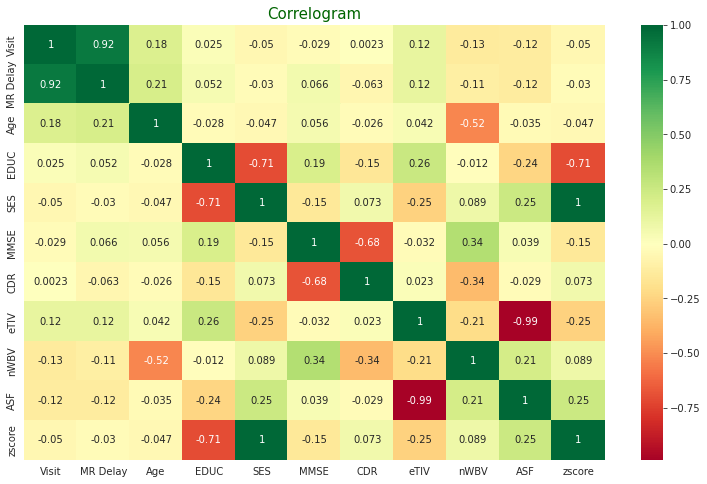

In [32]:
# Quantify correlations
corr = dementia.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [33]:
dementia.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             6
MMSE           19
CDR             4
eTIV          286
nWBV          136
ASF           265
zscore          6
dtype: int64

In [34]:
# Dummy Variable Handling
sex=pd.get_dummies(dementia['M/F'])
Hand=group=pd.get_dummies(dementia.Hand)

In [35]:
dementia= pd.concat([dementia,sex,Hand],axis = 1)

In [36]:
dementia
dementia=dementia.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)
dementia

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,zscore,F,M,R
0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883,-4.168248e-01,0,1,1
1,OAS2_0001,OAS2_0001_MR2,0,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876,-4.168248e-01,0,1,1
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046,-4.020124e-16,0,1,1
3,OAS2_0002,OAS2_0002_MR2,1,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010,-4.020124e-16,0,1,1
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034,-4.020124e-16,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037,-1.322076e+00,0,1,1
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040,-1.322076e+00,0,1,1
370,OAS2_0186,OAS2_0186_MR1,0,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331,-4.168248e-01,1,0,1
371,OAS2_0186,OAS2_0186_MR2,0,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323,-4.168248e-01,1,0,1


In [37]:
DEMENTIA=dementia.drop(['Subject ID', 'MRI ID','zscore'], axis = 1)

In [38]:
DEMENTIA
DEMENTIA=dementia.drop(['M/F', 'Hand'], axis = 1)

In [39]:
y=DEMENTIA['Group']
DEMENTIA=dementia.drop(['Group'], axis = 1)

In [40]:
DEMENTIA=DEMENTIA.drop(['Subject ID', 'MRI ID','zscore','Hand'], axis = 1)

In [41]:
X=DEMENTIA

In [42]:
y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

In [43]:
X

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R
0,1,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1,1
1,2,457,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876,0,1,1
2,1,0,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1,1
3,2,560,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010,0,1,1
4,3,1895,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037,0,1,1
369,3,2297,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040,0,1,1
370,1,0,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331,1,0,1
371,2,763,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323,1,0,1


In [44]:
X=DEMENTIA.drop(['M/F'], axis = 1)

[0.02482662 0.03801184 0.05650876 0.05779394 0.05514717 0.16391857
 0.37688283 0.06454398 0.05893125 0.05844914 0.01875073 0.02623517
 0.        ]


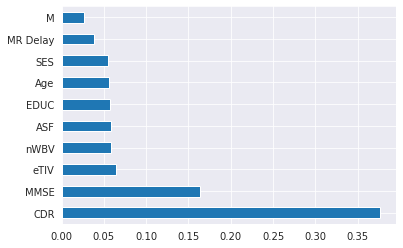

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat=pd.Series(model.feature_importances_,index=X.columns)
feat.nlargest(10).plot(kind='barh')
plt.show()

In [46]:
print(np.unique(y).size)

3


In [49]:
# Selecting the independent variables and the target variable
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from imblearn.under_sampling import RandomUnderSampler
sam=RandomUnderSampler(random_state=0)
X_resampled_under,y_resampled_under=sam.fit_resample(X_test,y_test)


# kfold = model_selection.KFold(n_splits=510)
# cart = DecisionTreeClassifier()
# num_trees = 1300
# model =XGBClassifier(base_estimator=cart,n_estimators=num_trees)
# model.fit(X_train, y_train)


# # Instantiating the model
# clf = RandomForestClassifier(max_depth = 5, random_state = 0)
clf=AdaBoostClassifier(random_state =96)
clf.fit(X_train, y_train)

# # Making predictions
y_pred = model.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        11

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



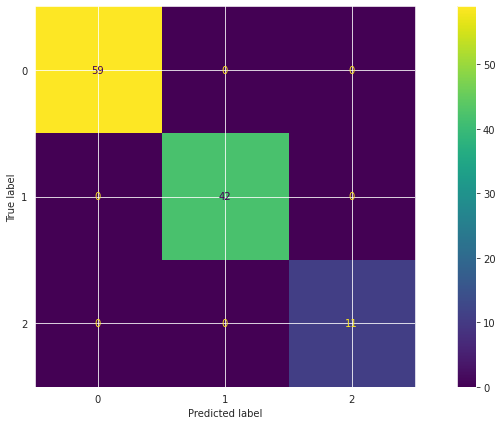

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()